In [1]:
import sys
sys.path.append('../src') 
from inference import FaceDuplicateDetector
from db import FaceVectorDB
from PIL import Image

In [2]:
db = FaceVectorDB(
    "../face_db"
)
print(f"✓ Database initialized")
print(f"  Current count: {db.get_count()}")

✓ Database initialized
  Current count: 2141


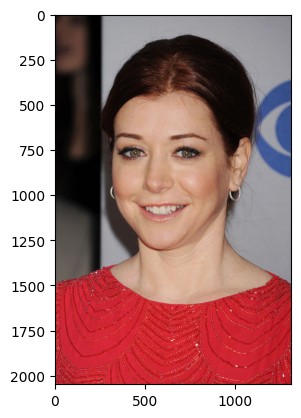

In [10]:
# set image query
query_path = "../data/test/alyson_hannigan_test.jpg"
img = Image.open(query_path)

import matplotlib.pyplot as plt
plt.imshow(img)

In [11]:
# set inference object
predictor = FaceDuplicateDetector("../config.yaml")
is_dup, match_info, top_matches = predictor.check_duplicate(query_path)

INFO:detector:Initializing MTCNN detector


In [14]:
match_info

{'image_path': 'data/images/Alyson Hannigan_70601.jpg',
 'metadata': {'thumbnail': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUDBAQEAwUEBAQFBQUGBwwIBwcHBw8LCwkMEQ8SEhEPERETFhwXExQaFRERGCEYGh0dHx8fExciJCIeJBweHx7/2wBDAQUFBQcGBw4ICA4eFBEUHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh7/wAARCABkAEMDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD5kh8OrNp0V0bplZxuK4yOtCeH3Uho7kfkRXSvBFb2CQwoEjUAACo4xx+FBLbGW6zRwBGlOVGOGP8AWtcwRNZx

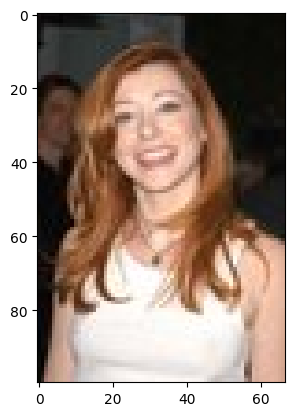

In [25]:
# show thumbnails
import base64
from io import BytesIO
import matplotlib.pyplot as plt

thumbnail_b64 = match_info.get('metadata')['thumbnail']

if thumbnail_b64:
    # Decode base64 to image
    img_data = base64.b64decode(thumbnail_b64)
    thumbnail = Image.open(BytesIO(img_data))
    
    plt.imshow(thumbnail)

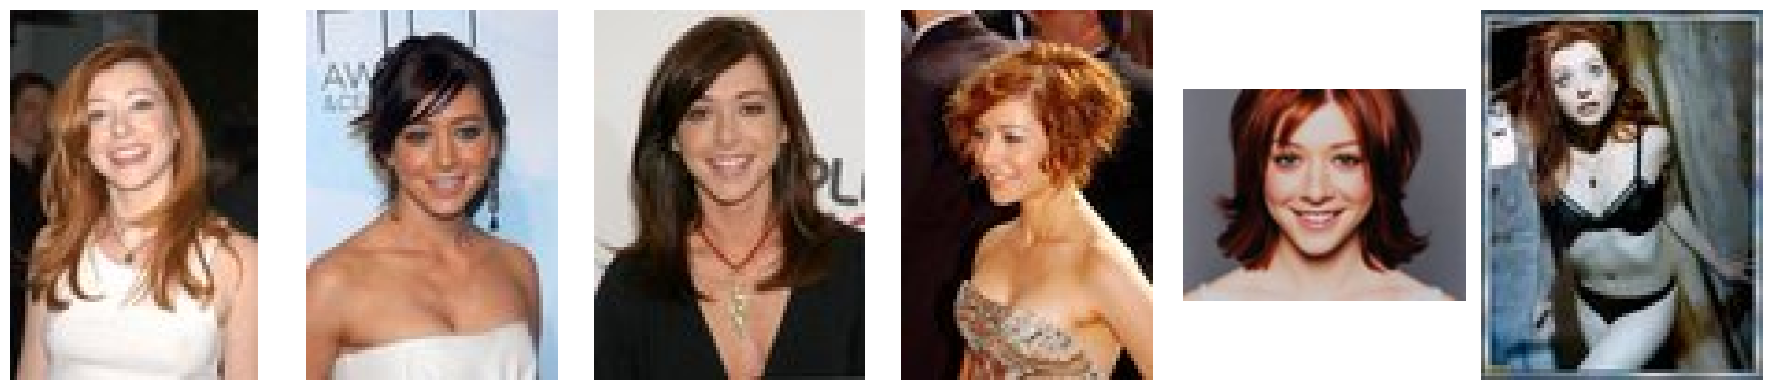

In [27]:
# show all matching images
fig, axes = plt.subplots(1, 6, figsize=(18, 4))  # adjust figsize for bigger/smaller images
images = []
for meta in top_matches.get('metadatas')[0]:
    thumbnail_b64 = meta.get("thumbnail")

    if thumbnail_b64:
    # Decode base64 to image
        img_data = base64.b64decode(thumbnail_b64)
        thumbnail = Image.open(BytesIO(img_data))

        images.append(thumbnail)

# plot the images
for ax, p in zip(axes, images):
    ax.imshow(p)
    ax.axis("off")                      # hide axes ticks

plt.tight_layout()
plt.show()